# Introduction




# Prepare for analysis

## Load packages

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
# TODO: Add all hard coded parameters like file paths or model parameters here
TRAIN_PATH = "train.csv"

## Read the data

In [4]:
train_df = pd.read_csv(TRAIN_PATH)

# TODO: Put the path at the top of the script and replace with variable
test_df = pd.read_csv("test.csv")

# Preliminary data inspection

## Quick glimpse of the data
TODO: Think if you can abstract away much here.

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Few statistics on the data

### Missing data

In [11]:
# TODO: turn into function
total = train_df.isnull().sum()
percent = (train_df.isnull().sum()/train_df.isnull().count()*100)
tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
types = []
for col in train_df.columns:
    dtype = str(train_df[col].dtype)
    types.append(dtype)
tt['Types'] = types
df_missing_train = np.transpose(tt)

In [12]:
# TODO: turn into function
total = test_df.isnull().sum()
percent = (test_df.isnull().sum()/test_df.isnull().count()*100)
tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
types = []
for col in test_df.columns:
    dtype = str(test_df[col].dtype)
    types.append(dtype)
tt['Types'] = types
df_missing_test = np.transpose(tt)

### Most frequent data

In [13]:
# TODO: turn into function
total = train_df.count()
tt = pd.DataFrame(total)
tt.columns = ['Total']
items = []
vals = []
for col in train_df.columns:
    try:
        itm = train_df[col].value_counts().index[0]
        val = train_df[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    except Exception as ex:
        print(ex)
        items.append(0)
        vals.append(0)
        continue
tt['Most frequent item'] = items
tt['Frequence'] = vals
tt['Percent from total'] = np.round(vals / total * 100, 3)
np.transpose(tt)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,891,891,891,891,891,714,891,891,891,891,204,889
Most frequent item,1,0,3,"Braund, Mr. Owen Harris",male,24.0,0,0,347082,8.05,B96 B98,S
Frequence,1,549,491,1,577,30,608,678,7,43,4,644
Percent from total,0.112,61.616,55.107,0.112,64.759,4.202,68.238,76.094,0.786,4.826,1.961,72.441


In [14]:
# TODO: turn into function
total = test_df.count()
tt = pd.DataFrame(total)
tt.columns = ['Total']
items = []
vals = []
for col in test_df.columns:
    try:
        itm = test_df[col].value_counts().index[0]
        val = test_df[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    except Exception as ex:
        print(ex)
        items.append(0)
        vals.append(0)
        continue
tt['Most frequent item'] = items
tt['Frequence'] = vals
tt['Percent from total'] = np.round(vals / total * 100, 3)
np.transpose(tt)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,418,418,418,418,332,418,418,418,417,91,418
Most frequent item,892,3,"Kelly, Mr. James",male,21.0,0,0,PC 17608,7.75,B57 B59 B63 B66,S
Frequence,1,218,1,266,17,283,324,5,21,3,270
Percent from total,0.239,52.153,0.239,63.636,5.12,67.703,77.512,1.196,5.036,3.297,64.593


### Unique values

In [15]:
# TODO: turn into function
total = train_df.count()
tt = pd.DataFrame(total)
tt.columns = ['Total']
uniques = []
for col in train_df.columns:
    unique = train_df[col].nunique()
    uniques.append(unique)
tt['Uniques'] = uniques
np.transpose(tt)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,891,891,891,891,891,714,891,891,891,891,204,889
Uniques,891,2,3,891,2,88,7,7,681,248,147,3


In [16]:
# TODO: turn into function
total = test_df.count()
tt = pd.DataFrame(total)
tt.columns = ['Total']
uniques = []
for col in test_df.columns:
    unique = test_df[col].nunique()
    uniques.append(unique)
tt['Uniques'] = uniques
np.transpose(tt)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,418,418,418,418,332,418,418,418,417,91,418
Uniques,418,3,418,2,79,7,8,363,169,76,3


# Exploratory data analysis

## Univariate analysis for all features


We show here two graphs in paralel:
* distribution of class values, split per Survived value
* comparison of class values, in train and test data


Let's first aggregate train and test data into one single dataframe, `all_df`.

In [17]:
# TODO: turn into function
all_df = pd.concat([train_df, test_df], axis=0)
all_df["set"] = "train"
all_df.loc[all_df.Survived.isna(), "set"] = "test"

In [18]:
def concat_train_test(train_df, test_df):
    """
    Combine train and test data into a single dataframe
    
    Args:
    train_df (pd.DataFrame):  training data
    test_df (pd.DataFrame):  test data
    
    Returns:
    all_df (pd.DataFrame): combined dataframe of train and test data
    """
    all_df = pd.concat([train_df, test_df], axis=0)
    #set identifi
    all_df["set"] = "train"
    all_df.loc[all_df.Survived.isna(), "set"] = "test"
    return all_df

In [19]:
all_df = concat_train_test(train_df, test_df)

In [20]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [21]:
all_df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
set               0
dtype: int64

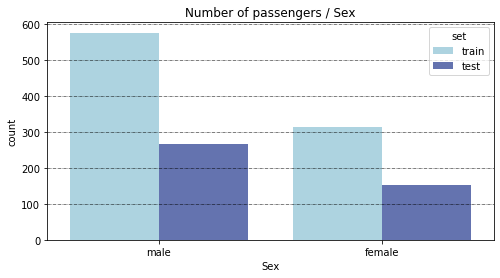

In [22]:
# Plot count pairs "Sex"
color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0b2447"]
f, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.countplot(x="Sex", data=all_df, hue="set", palette= color_list)
plt.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
ax.set_title("Number of passengers / Sex")
plt.show()  

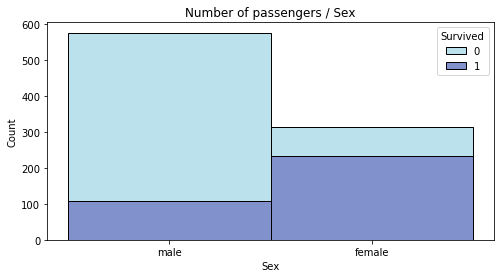

In [23]:
# Plot distribution pairs for "Sex" and hue as "Survived" 
color_list = ["#A5D7E8", "#576CBC"]

# Plot
f, ax = plt.subplots(1, 1, figsize=(8, 4))

# Use hue to differentiate between "Survived" categories
g = sns.histplot(
    train_df, 
    x="Sex", 
    hue="Survived", 
    multiple="stack",  # Stacks the bars
    palette=color_list,  # Use your color list for hue
    ax=ax
)

# Set title and show plot
ax.set_title("Number of passengers / Sex")
plt.show()


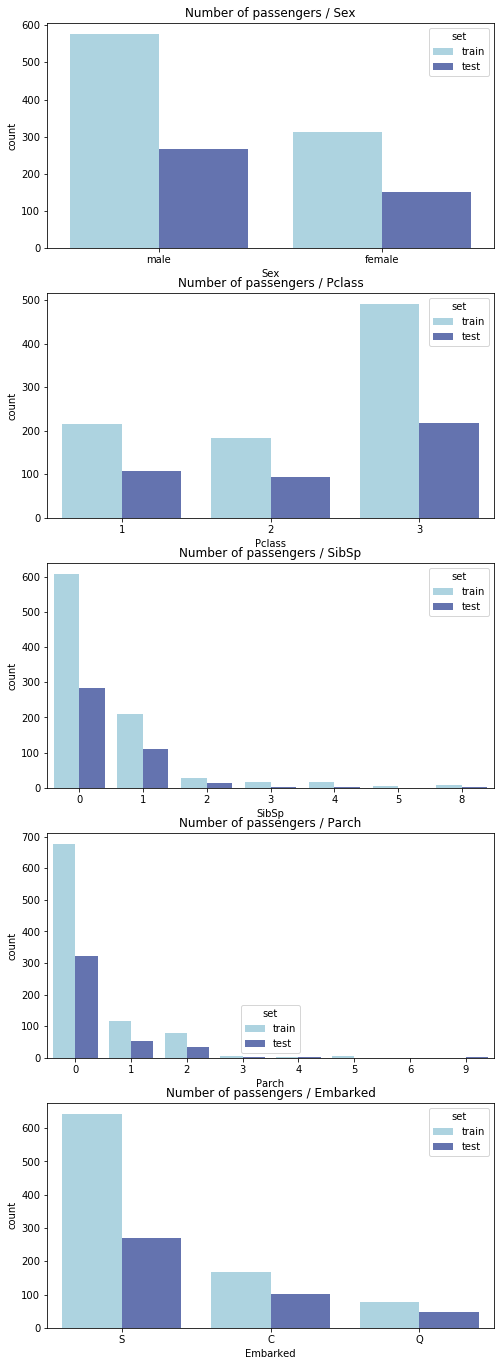

In [24]:
# Plot count pairs using all_df for the columns: Sex, Pclasss, SibSp, Parch, Embarked

color_list = ["#A5D7E8", "#576CBC"]

target_column = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]

# set up subplot
f, ax = plt.subplots(len(target_column), 1, figsize=(8, 24))

# loop through each target column to plot
for i, col in enumerate(target_column):
    sns.countplot(
    data = all_df.dropna(subset=[col]),  #handle missing values
    x=col,  
    hue='set',
    palette=color_list, 
    ax=ax[i])

    # Set title and show plot
    ax[i].set_title(f"Number of passengers / {col}")

plt.show()


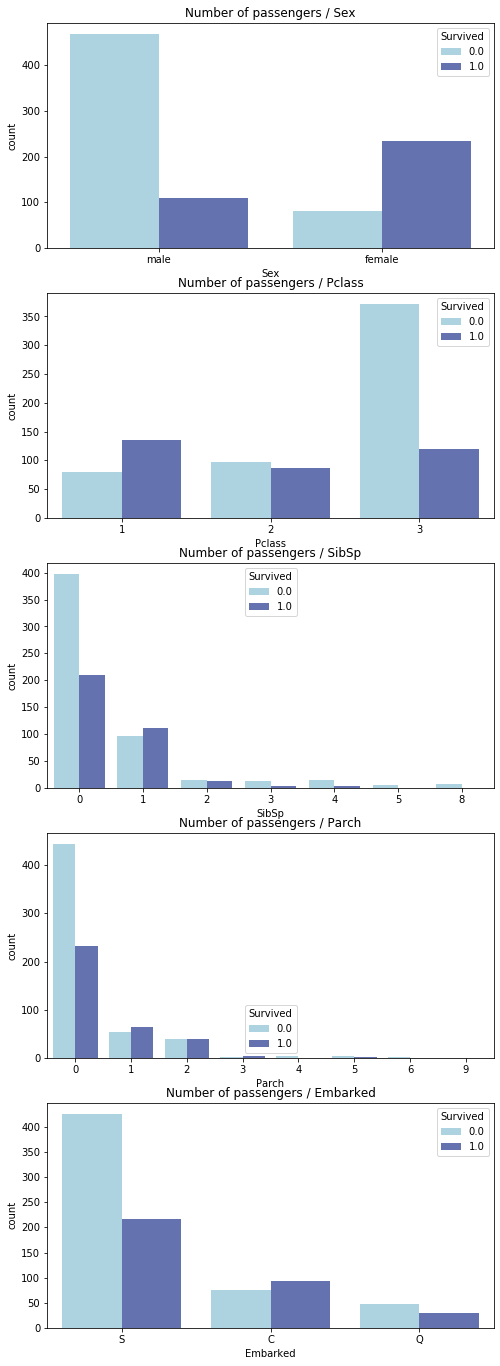

In [25]:
# Plot count pairs using all_df for the columns: Sex, Pclasss, SibSp, Parch, Embarked and use "Survived" as hue.

color_list = ["#A5D7E8", "#576CBC"]

target_column = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]

# set up subplot
f, ax = plt.subplots(len(target_column), 1, figsize=(8, 24))

# loop through each target column to plot
for i, col in enumerate(target_column):
    sns.countplot(
    data = all_df.dropna(subset=[col]),  #handle missing values
    x=col,
    hue="Survived", 
    palette=color_list, 
    ax=ax[i])

    # Set title and show plot
    ax[i].set_title(f"Number of passengers / {col}")

plt.show()


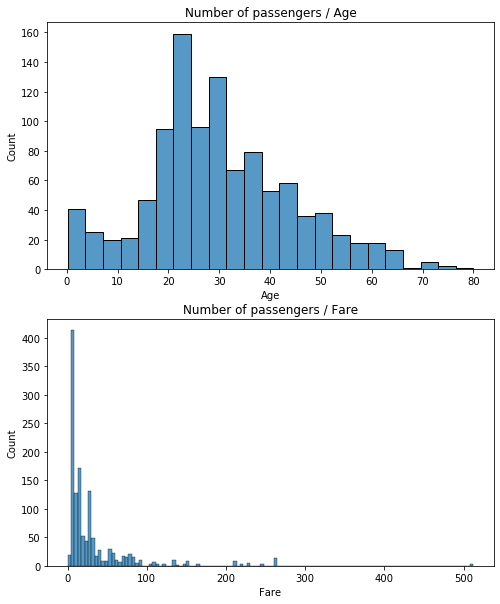

In [26]:
# Plot distribution pairs for Age and Fare

color_list = ["#A5D7E8", "#576CBC"]
target_column = ["Age", "Fare"]

# set up subplot
f, ax = plt.subplots(len(target_column), 1, figsize=(8, 10))

# loop through each target column to plot
for i, col in enumerate(target_column):
    sns.histplot(
    data = all_df.dropna(subset=[col]),  #handle missing values
    x=col,
    palette=color_list, 
    multiple = "stack",
    ax=ax[i])

    # Set title and show plot
    ax[i].set_title(f"Number of passengers / {col}")

plt.show()


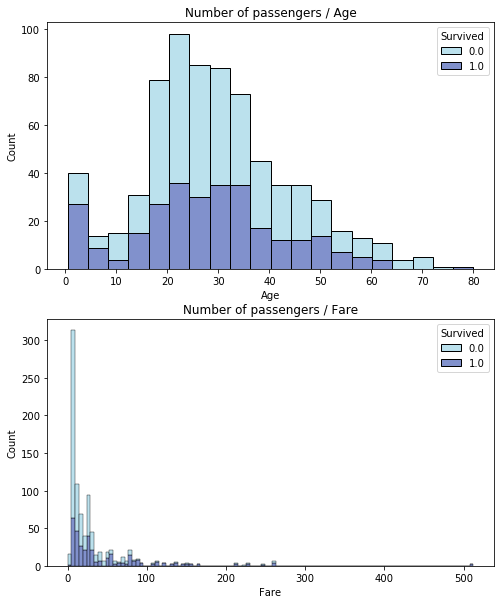

In [27]:
# Plot distribution pairs for Age and Fare using "Survived" as hue

color_list = ["#A5D7E8", "#576CBC"]
target_column = ["Age", "Fare"]

# set up subplot
f, ax = plt.subplots(len(target_column), 1, figsize=(8, 10))

# loop through each target column to plot
for i, col in enumerate(target_column):
    sns.histplot(
    data = all_df.dropna(subset=[col]),  #handle missing values
    x=col,
    hue = "Survived",
    palette=color_list, 
    multiple = "stack",
    ax=ax[i])

    # Set title and show plot
    ax[i].set_title(f"Number of passengers / {col}")

plt.show()


## Family size


Based on SibSp (sibilings or spouse) and Parch (parents or children), we set the Family Size field.

In [28]:
# TODO: turn into function
all_df["Family Size"] = all_df["SibSp"] + all_df["Parch"] + 1

def set_family_size(df):
    """ Set Family Size column based on SinSp and Parch columns
    
    Args:
    df (pd.DataFrame):  dataframe containing SibSp and Parch columns
    
    Returns:
    df (pd.DataFrame): dataframe with Family Size column added
    """
    df["Family Size"] = df["SibSp"] + df["Parch"] + 1
    return df

In [29]:
all_df = set_family_size(all_df)
all_df['Family Size'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [30]:
# TODO: turn into function
train_df["Family Size"] = train_df["SibSp"] + train_df["Parch"] + 1

train_df = set_family_size(train_df)

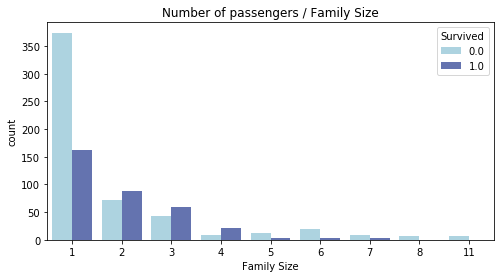

In [31]:
# Plot count pairs using all_df for the column "Family Size" and use "Survived" as hue.

f, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.countplot(x="Family Size", data=all_df, hue="Survived", palette= color_list)
ax.set_title("Number of passengers / Family Size")
ax.legend(title = 'Survived',loc = 'upper right')
plt.show()  

## Age interval

In [32]:
# TODO: turn into function
all_df["Age Interval"] = 0.0
all_df.loc[ all_df['Age'] <= 16, 'Age Interval']  = 0
all_df.loc[(all_df['Age'] > 16) & (all_df['Age'] <= 32), 'Age Interval'] = 1
all_df.loc[(all_df['Age'] > 32) & (all_df['Age'] <= 48), 'Age Interval'] = 2
all_df.loc[(all_df['Age'] > 48) & (all_df['Age'] <= 64), 'Age Interval'] = 3
all_df.loc[ all_df['Age'] > 64, 'Age Interval'] = 4

def set_age_interval(df):
    """
    Set Age Interval column based on Age column
    
    Args:
    df (pd.DataFrame):  dataframe containing Age columns
    
    Returns: 
    df (pd.DataFrame): dataframe with Age Interval column added
    """

    df["Age Interval"] = 0.0
    df.loc[ df['Age'] <= 16, 'Age Interval']  = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age Interval'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age Interval'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age Interval'] = 3
    df.loc[ df['Age'] > 64, 'Age Interval'] = 4

    return df

In [33]:
all_df = set_age_interval(all_df)

In [34]:
# TODO: turn into function
train_df["Age Interval"] = 0.0
train_df.loc[train_df['Age'] <= 16, 'Age Interval']  = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age Interval'] = 1
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age Interval'] = 2
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age Interval'] = 3
train_df.loc[ train_df['Age'] > 64, 'Age Interval'] = 4

In [35]:
train_df = set_age_interval(train_df)

In [36]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set,Family Size,Age Interval
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,2,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,2,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,1,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,2,2.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,1,2.0


def count_plot(xcol, df, huecol, colorlist):
    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    sns.countplot(x=xcol, data=df.dropna(subset=[xcol]), hue=huecol, palette= colorlist)
    ax.set_title(f"Number of passengers / {xcol}")
    ax.legend(title = huecol,loc = 'upper right')
    plt.show()  

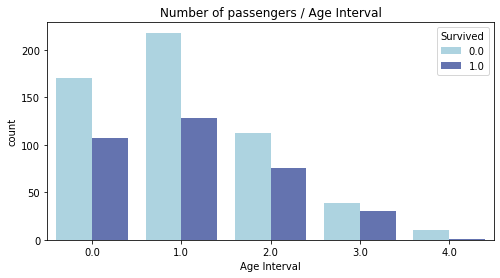

In [47]:
# Plot count pairs using all_df for the column "Age Interval" and use "Survived" as hue.
f, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.countplot(x="Age Interval", data=all_df, hue="Survived", palette= color_list)
ax.set_title("Number of passengers / Age Interval")
ax.legend(title = 'Survived',loc = 'upper right')
plt.show()  

## Fare interval

In [47]:
# TODO: turn into function
all_df['Fare Interval'] = 0.0
all_df.loc[ all_df['Fare'] <= 7.91, 'Fare Interval'] = 0
all_df.loc[(all_df['Fare'] > 7.91) & (all_df['Fare'] <= 14.454), 'Fare Interval'] = 1
all_df.loc[(all_df['Fare'] > 14.454) & (all_df['Fare'] <= 31), 'Fare Interval']   = 2
all_df.loc[ all_df['Fare'] > 31, 'Fare Interval'] = 3

In [44]:
def set_fare_interval(df):
    """
    Set Fare Interval column based on Fare column
    
    Args:
    df (pd.DataFrame):  dataframe containing Fare columns
    
    Returns: 
    df (pd.DataFrame): dataframe with Fare Interval column added
    """
    df['Fare Interval'] = 0.0
    df.loc[ df['Fare'] <= 7.91, 'Fare Interval'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare Interval'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare Interval']   = 2
    df.loc[ df['Fare'] > 31, 'Fare Interval'] = 3
    return df


In [45]:
all_df = set_fare_interval(all_df)
all_df['Fare Interval'].unique()

array([0., 3., 1., 2.])

In [48]:
# TODO: turn into function
train_df['Fare Interval'] = 0.0
train_df.loc[ train_df['Fare'] <= 7.91, 'Fare Interval'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare Interval'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare Interval']   = 2
train_df.loc[ train_df['Fare'] > 31, 'Fare Interval'] = 3

In [46]:
train_df = set_fare_interval(train_df)

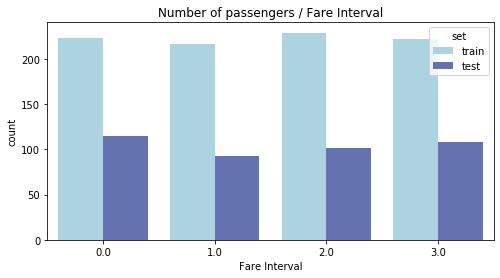

In [52]:
# Plot count pairs using all_df for the column "Fare Interval"

f, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.countplot(x="Fare Interval", data=all_df, hue='set', palette= color_list)
ax.set_title("Number of passengers / Fare Interval")
plt.show()  

Let's create a composed feature: Pclass + Sex.

In [50]:
# TODO: turn into function
train_df["Sex_Pclass"] = train_df.apply(lambda row: row['Sex'][0].upper() + "_C" + str(row["Pclass"]), axis=1)

In [49]:
def create_sex_Pclass(df):
    """
    Create a composed feature: Pclass + Sex
    
    Args:
    df (pd.DataFrame):  dataframe containing Pclass and Sex columns
    
    Returns: 
    df (pd.DataFrame): dataframe with Sex_Pclass column added
    """

    df["Sex_Pclass"] = df.apply(lambda row: row['Sex'][0].upper() + "_C" + str(row["Pclass"]), axis=1)
    return df



In [51]:
# TODO: turn into function
all_df["Sex_Pclass"] = all_df.apply(lambda row: row['Sex'][0].upper() + "_C" + str(row["Pclass"]), axis=1)

In [50]:
all_df = create_sex_Pclass(all_df)
train_df = create_sex_Pclass(train_df)

In [ ]:
all_df.groupby('survival', as_index=False)

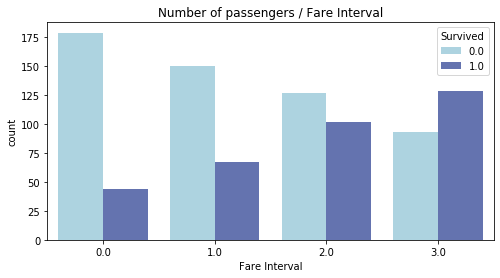

In [53]:
# Plot count pairs using all_df for the column "Fare Interval" and "Fare (grouped by survival)" with "Survived" as hue

f, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.countplot(x="Fare Interval", data=all_df, hue="Survived", palette= color_list)
ax.set_title("Number of passengers / Fare Interval")
ax.legend(title = 'Survived',loc = 'upper right')
plt.show()  

## Process names


When we process names, we would like to extract the following information:

- Family name - this is the first word (or few first words, if a family name with multiple names), followed by a comma  
- Title - this follows just after the comma   
- Given name - this is the word or group of words following family name  
- Maiden name - for ladies, is given between parantheses  

We start with creating a function that parses the Name string and extract (if possible) these 4 elements


In [55]:
# TODO: also move this function to a separate file
def parse_names(row):
    try:
        text = row["Name"]
        split_text = text.split(",")
        family_name = split_text[0]
        next_text = split_text[1]
        split_text = next_text.split(".")
        title = (split_text[0] + ".").lstrip().rstrip()
        next_text = split_text[1]
        if "(" in next_text:
            split_text = next_text.split("(")
            given_name = split_text[0]
            maiden_name = split_text[1].rstrip(")")
            return pd.Series([family_name, title, given_name, maiden_name])
        else:
            given_name = next_text
            return pd.Series([family_name, title, given_name, None])
    except Exception as ex:
        print(f"Exception: {ex}")
    
    

In [59]:
# TODO: turn into function
all_df[["Family Name", "Title", "Given Name", "Maiden Name"]] = all_df.apply(lambda row: parse_names(row), axis=1)

In [56]:
def process_name(df):
    """
    Extract information from Name column and create Family Name, Title, Given Name, Maiden Name columns
    
    Args:
    df (pd.DataFrame):  dataframe containing Name column
    
    Returns: 
    df (pd.DataFrame): dataframe with Family Name, Title, Given Name, Maiden Name columns added
    """

    df[["Family Name", "Title", "Given Name", "Maiden Name"]] = df.apply(lambda row: parse_names(row), axis=1)
    return df
    

In [60]:
# TODO: turn into function
train_df[["Family Name", "Title", "Given Name", "Maiden Name"]] = train_df.apply(lambda row: parse_names(row), axis=1)

In [57]:
all_df = process_name(all_df)
train_df = process_name(train_df)

## Multivariate analysis


Let's look now to the interaction of multiple features.

In [ ]:
# TODO: Plot count pairs of "Age Interval" grouped by "Pclass"

In [ ]:
# TODO: Plot count pairs of "Age Interval" grouped by "Embarked"

In [ ]:
# TODO: Plot count pairs of "Pclass" grouped by "Fare Interval"

### Few more engineered data 


Let's create two more engineered features:  
* Family size interval: Single, Small, Large  
* Aggregated titles: Mr, Mrs, Master, Miss, and Rare  

In [91]:
# TODO: turn into function
for dataset in [all_df, train_df]:
    dataset["Family Type"] = dataset["Family Size"]

In [92]:
# TODO: turn into function
for dataset in [all_df, train_df]:
    dataset.loc[dataset["Family Size"] == 1, "Family Type"] = "Single"
    dataset.loc[(dataset["Family Size"] > 1) & (dataset["Family Size"] < 5), "Family Type"] = "Small"
    dataset.loc[(dataset["Family Size"] >= 5), "Family Type"] = "Large"

In [93]:
for dataset in [all_df, train_df]:
    dataset["Titles"] = dataset["Title"]

In [94]:
# TODO: turn into function
for dataset in [all_df, train_df]:
    #unify `Miss`
    dataset['Titles'] = dataset['Titles'].replace('Mlle.', 'Miss.')
    dataset['Titles'] = dataset['Titles'].replace('Ms.', 'Miss.')
    #unify `Mrs`
    dataset['Titles'] = dataset['Titles'].replace('Mme.', 'Mrs.')
    # unify Rare
    dataset['Titles'] = dataset['Titles'].replace(['Lady.', 'the Countess.','Capt.', 'Col.',\
     'Don.', 'Dr.', 'Major.', 'Rev.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Rare')

In [ ]:
# TODO: turn into function
train_df[['Titles', 'Sex', 'Survived']].groupby(['Titles', 'Sex'], as_index=False).mean()

# Baseline model

## Feature engineering: Map categorical value to numerical values

In [98]:
# TODO: turn into function
for dataset in [train_df, test_df]:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

Create train-validation split.

In [99]:
VALID_SIZE = 0.2
train, valid = train_test_split(train_df, test_size=VALID_SIZE, random_state=42, shuffle=True)

Define predictor features and target feature.

In [100]:
predictors = ["Sex", "Pclass"]
target = 'Survived'

Define the training and validation data and labels.

In [101]:
# TODO: turn into function
train_X = train[predictors]
train_Y = train[target].values
valid_X = valid[predictors]
valid_Y = valid[target].values

Initialize the classifiction algorithm.

In [102]:
# TODO: could this and the following code cells be turned into a function that returns the prediction?
clf = RandomForestClassifier(n_jobs=-1, 
                             random_state=42,
                             criterion="gini",
                             n_estimators=100,
                             verbose=False)

Fit the classifier with the training data.

In [ ]:
clf.fit(train_X, train_Y)

Predict the train data (to check the training classification error).

In [104]:
preds_tr = clf.predict(train_X)

Predict the validation data.

In [105]:
preds = clf.predict(valid_X)

# Evaluation

## Classification report for training data.

In [ ]:
print(metrics.classification_report(train_Y, preds_tr, target_names=['Not Survived', 'Survived']))

Classification report for validation data.

In [ ]:
print(metrics.classification_report(valid_Y, preds, target_names=['Not Survived', 'Survived']))